In [1]:
!pip install pytube

     -------------------------------------- 57.0/57.0 kB 995.4 kB/s eta 0:00:00


In [2]:
import pytube

url = "https://www.youtube.com/watch?v=7RWzdihX9N8" 

pytube.YouTube(url).streams.filter(only_audio=True, file_extension="mp4")[0].download(output_path=".", filename="downloads.mp4")

'c:\\Users\\Guder\\Documents\\GitHub\\audio-processing-basics\\.\\downloads.mp4'

In [3]:
!ffmpeg -i download.mp4 audio.wav

ffmpeg version 5.1.2-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable

In [ ]:
!pip install librosa

In [22]:
import librosa

y, sr = librosa.load("./audio.wav", sr=16000, mono=True)
y.shape

(1751342,)

In [36]:
normalizedy = librosa.util.normalize(y)
S = librosa.feature.melspectrogram(y=normalizedy, sr=sr, n_mels=128,
                                   fmax=8000)


mfccs = librosa.feature.mfcc(y=normalizedy, sr=sr)


[Text(0.5, 1.0, 'MFCC')]

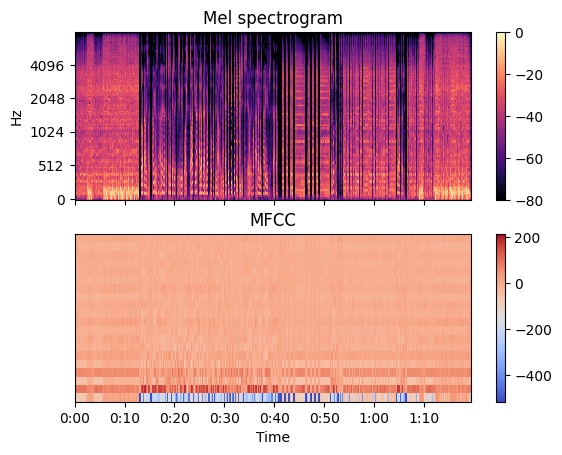

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')